# Clustering & PCA Assignment

### NGO Help International

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
The NGO wants to know:

The categories of countries using some socio-economic and health factors that determine overall development of the country.
The countries which the CEO needs to focus on the most.

Based on various market surveys, the NGO has gathered a large dataset containing the socio-economic factors of the countries.


### Objectives

Our main task is to cluster the countries by the factors mentioned above and then present our solution and recommendations to the CEO using a PPT

## Importing Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
ngo = pd.read_csv("C:/Users/hp/Desktop/Country-data.csv")

In [3]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Understanding

In [4]:
print(len(ngo))

167


In [5]:
# Getting idea about the dataset
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### There are no null values.

In [7]:
ngo.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

#### ngo dataset has all unique values


In [8]:
# Checking the percentage of missing values
round(100*(ngo.isnull().sum()/len(ngo.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

##### Exports, Health and imports are expressed as percentage of the total income.Let's convert them from percentage values to actual values of their GDP per capita as the percetage values will not display a clear scenario of the country.


In [9]:
ngo['imports'] = ngo['imports']*ngo['gdpp']/100

In [10]:
ngo['exports']=(ngo['exports'] * ngo['gdpp'])/100

In [11]:
ngo['health'] = ngo['health']*ngo['gdpp']/100

In [12]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
ngo.shape

(167, 10)

In [14]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [15]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [16]:
ngo.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Data Preparation

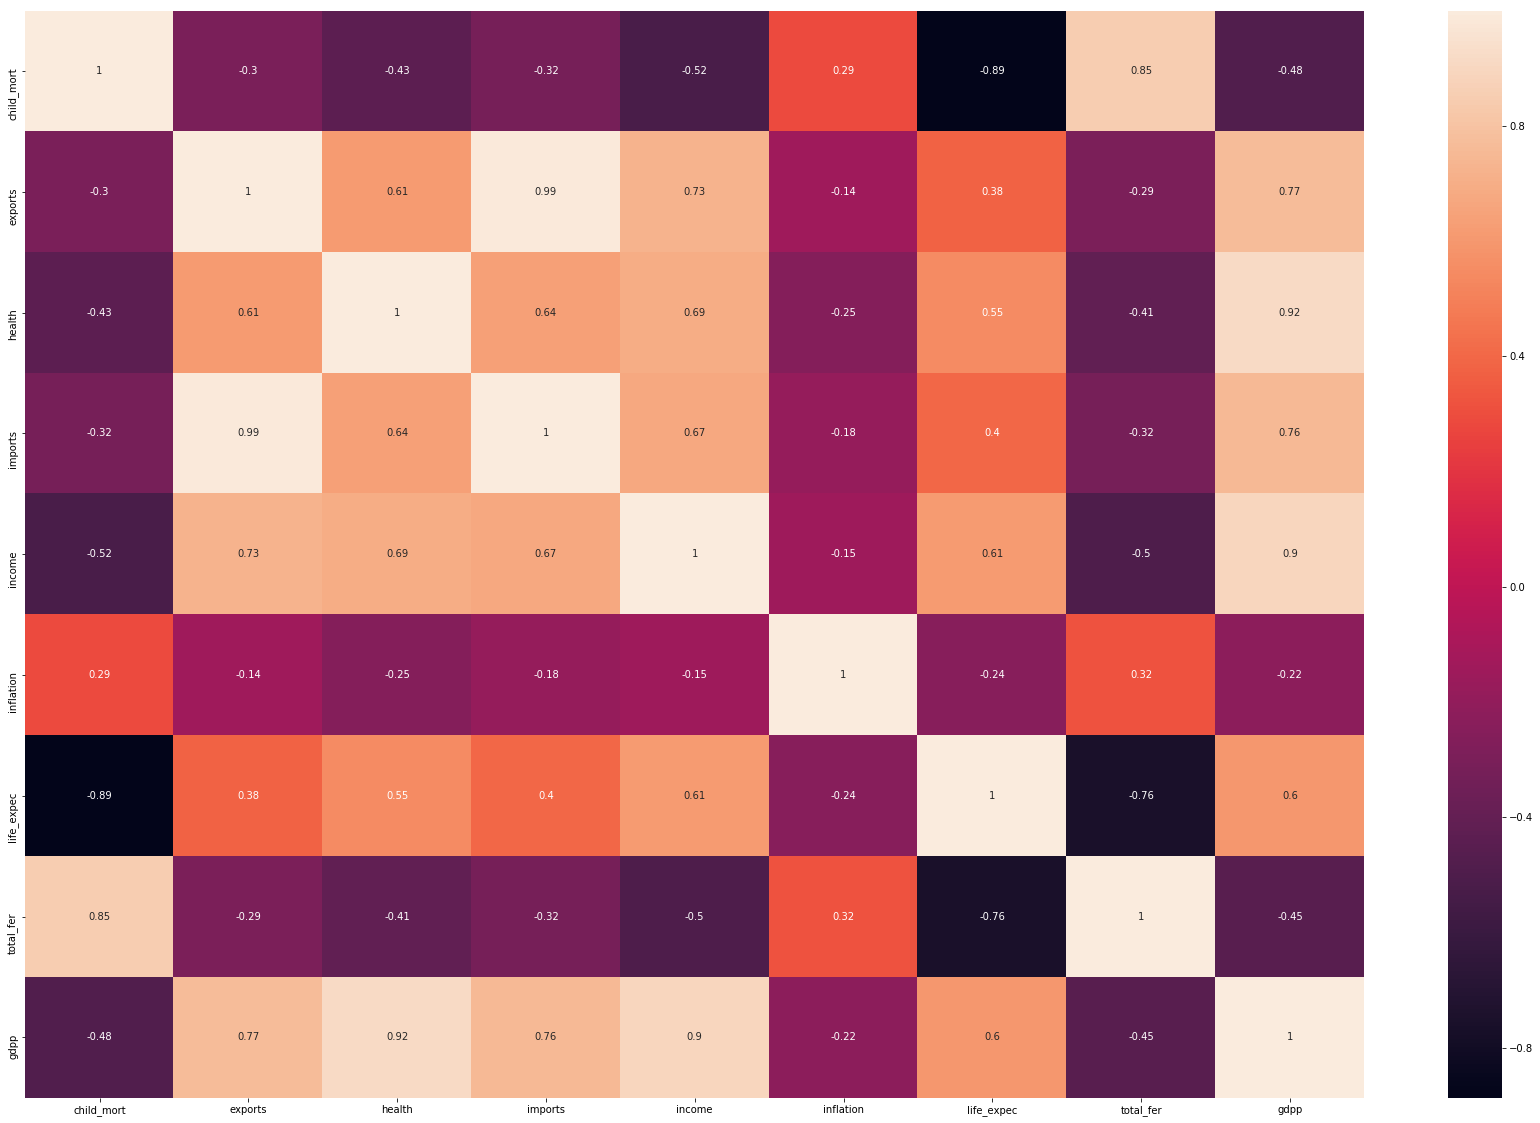

In [17]:
#let's plot the correlation matrix to check if the data is highly correlated
plt.figure(figsize = (30,20))        
sns.heatmap(ngo.corr(),annot = True)

#### There are many highly correlated variables so the we can go ahead and use PCA. 

In [18]:
# Normalising continuous features
#removing Country-names as it is categorical
data_df=ngo.drop(['country'],axis=1)

In [19]:
data_df.head()  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Standardising Data
#### Now we standardise the data for plottings.

#### If there is some obvious multicollinearity going on, this is the first place to catch it
#### Here's where we'll also identify if some predictors directly have a strong association with the outcome variable
#### We'll visualise our data using matplotlib and seaborn.

In [20]:
normal_df=(data_df-data_df.mean())/data_df.std()
df_c = ngo[['country']]
data_df = pd.concat([df_c,normal_df],axis=1)
data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [21]:
data_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,1.555642e-16,-2.393295e-17,1.336256e-16,1.296368e-17,-7.445807e-17,1.329608e-17,3.616535e-16,1.728491e-17,2.393295e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.844782e-01,-4.127957e-01,-5.794975e-01,-4.478136e-01,-8.577462e-01,-1.134440e+00,-4.324181e+00,-1.187678e+00,-6.947112e-01
25%,-7.443802e-01,-3.879784e-01,-5.430181e-01,-4.043378e-01,-7.153045e-01,-5.649418e-01,-5.909802e-01,-7.616117e-01,-6.347506e-01
50%,-4.703834e-01,-3.139654e-01,-4.079292e-01,-3.088050e-01,-3.726872e-01,-2.262699e-01,2.860972e-01,-3.553621e-01,-4.530683e-01
75%,5.908894e-01,-7.934781e-03,-4.429489e-02,7.689909e-02,2.933547e-01,2.807919e-01,7.021467e-01,6.156736e-01,5.924283e-02
max,4.208640e+00,9.810309e+00,4.222732e+00,9.687546e+00,5.594716e+00,9.102343e+00,1.376822e+00,3.000326e+00,5.021405e+00


#### Let's again check the data for correlation

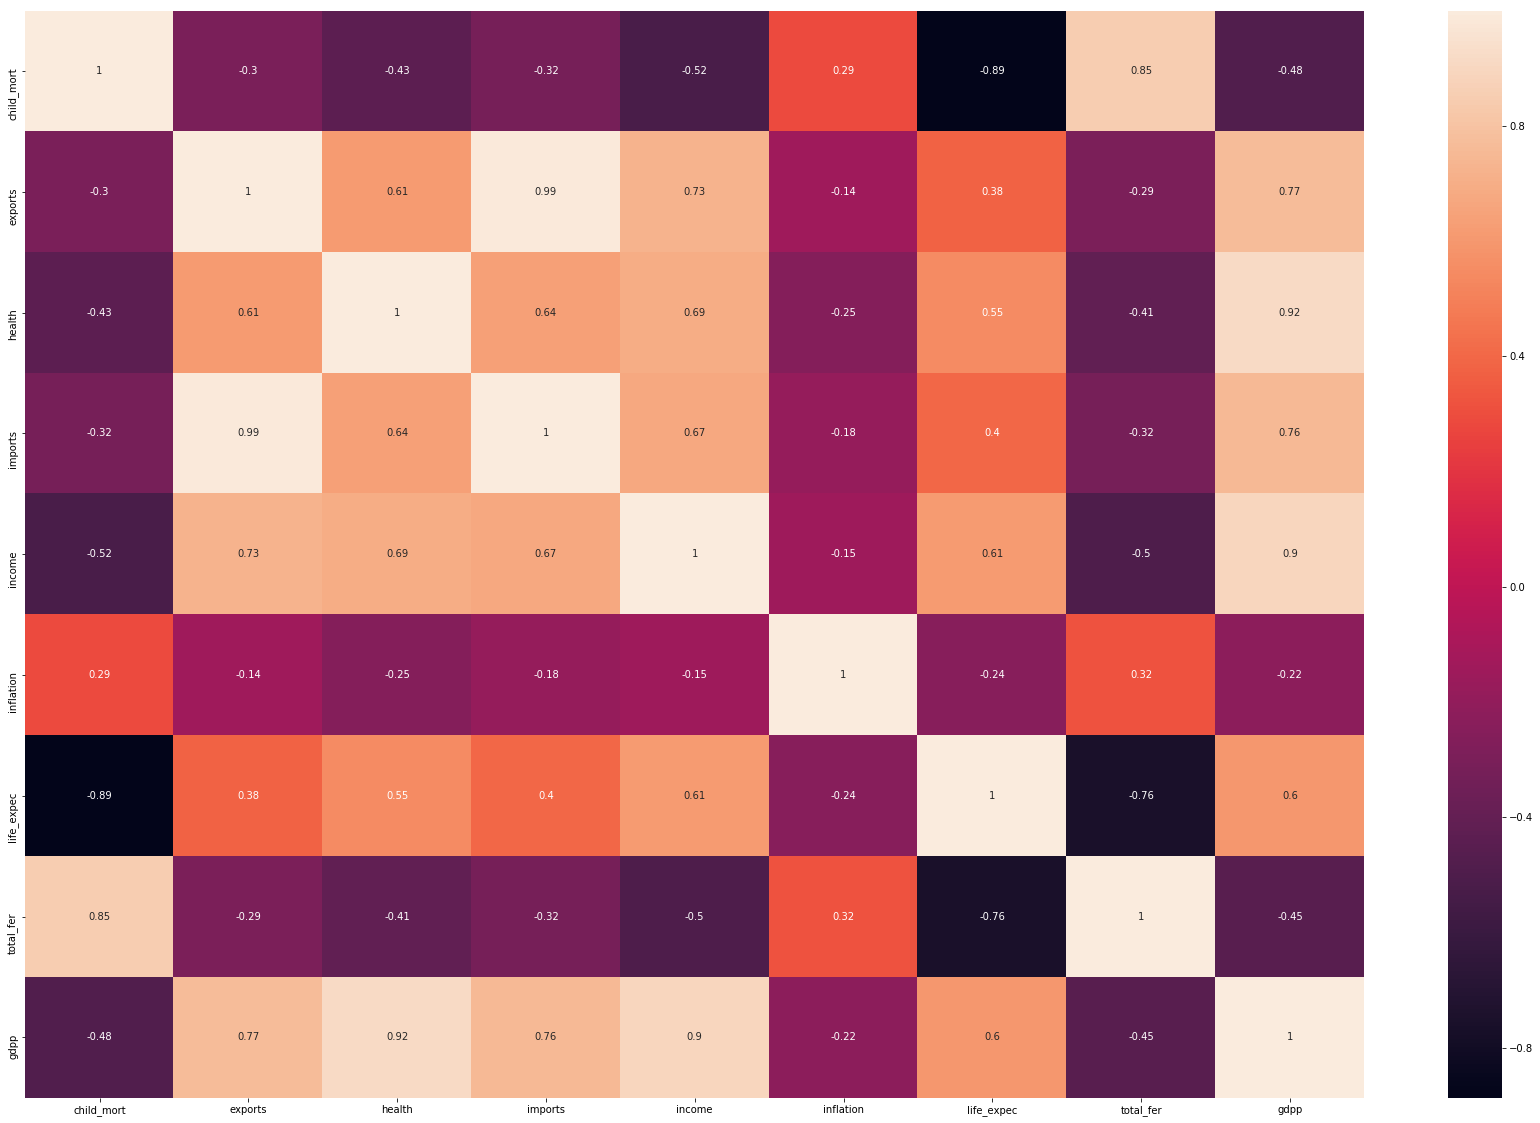

In [22]:
plt.figure(figsize = (30,20)) 
sns.heatmap(data_df.corr(), annot=True)
plt.show()

#### We can see from the heatmap that there is high correlation between various variables. So PCA can be applied which will take care of correlation and also reduce the dimensionality if required

## PCA on the data
#### Note -
#### While computng the principal components, since there is no need to divide the original dataset in test and train data, so we apply PCA and calculate PCs on the original dataset itself.

In [23]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
du = standard_scaler.fit_transform(normal_df)

In [24]:
du

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [25]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [26]:
#Doing the PCA on the data
pca.fit(normal_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [27]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

##### Looking at the screeplot to assess the number of principal components needed

In [28]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

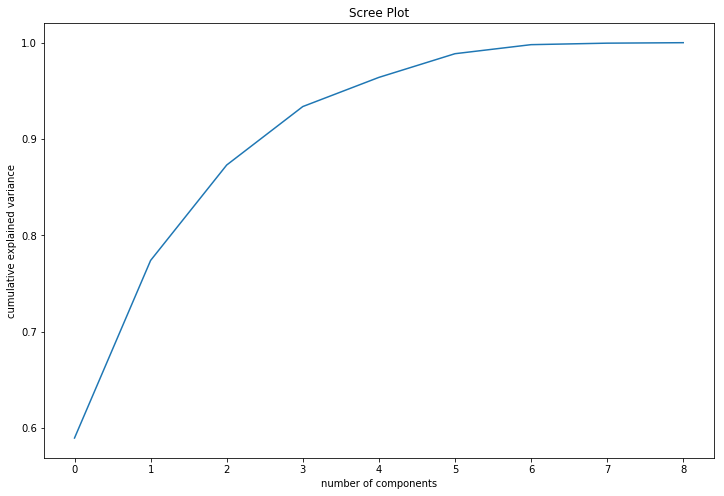

In [29]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

### Looks like 4 components are enough to describe 94% of the variance in the dataset
#### We'll choose 4 components for our modeling


In [31]:
pca_final = PCA(svd_solver='randomized', random_state=42, n_components=4)

### Basis transformation - getting the data onto our PCs

In [32]:
df_pca = pca_final.fit_transform(normal_df)
df_pca.shape

(167, 4)

In [33]:
pca_final.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239]])

In [34]:
#converting components(eigen vectors) into a dataframe
colnames = list(normal_df.columns)
eigen_df = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1], 'PC3':pca_final.components_[2],'PC4':pca_final.components_[3],'Feature':colnames})
eigen_df.head(10)

,PC1,PC2,PC3,PC4,Feature
0,-0.316392,0.476267,-0.150012,-0.148052,child_mort
1,0.342887,0.397311,-0.030574,0.449425,exports
2,0.358535,0.155053,-0.075703,-0.599712,health
3,0.344865,0.370781,-0.072174,0.461798,imports
4,0.380041,0.128384,0.145764,-0.154806,income
5,-0.143085,0.221261,0.948419,-0.007628,inflation
6,0.343857,-0.369820,0.196752,-0.018395,life_expec
7,-0.302842,0.459715,-0.077834,-0.213928,total_fer
8,0.399988,0.200624,0.010339,-0.364772,gdpp


#### We'll plot them to see which variables are well explained by these 4 components. We'll use only the first 2 PCs here and check their variance. 

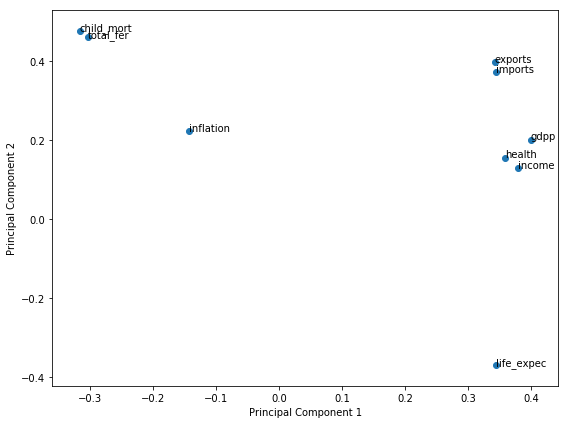

In [35]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(eigen_df.PC1, eigen_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(eigen_df.Feature):
    plt.annotate(txt, (eigen_df.PC1[i],eigen_df.PC2[i]))
plt.tight_layout()
plt.show()

##### A lot of variables have a good loading score on the first principal component. Similarly Child mortality and total fertility is well explained by the 2nd prinicpal component.

##### gdpp,health,income,life expectancy is well explained by PC1. On the other hand, PC2 explains child mortality and total fertility.

In [36]:
#We are observing 94% variance with 4 principal components. So let's take the data until that many components
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [37]:
#let's project our original data on the 4 principal components
df_train_pca = pca_final.fit_transform(du)
df_train_pca.shape

(167, 4)

In [38]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(df_train_pca)
pc

array([[-2.63664719e+00, -2.38453563e-02, -4.59260048e-01,
        -2.72358099e+00,  6.48777079e-01,  3.64467926e-02,
        -3.34274149e-01,  3.18436150e+00,  3.81813720e+00,
        -4.67475427e-01,  1.49957973e+00,  1.47129299e+00,
        -1.01520291e+00,  8.44516996e-01, -1.45349574e-02,
         3.96110220e+00, -4.04074594e-01, -2.36500877e+00,
        -7.16069241e-01, -1.01892957e+00,  2.51204905e-01,
        -1.12955278e+00,  1.66174419e-01,  2.69869864e+00,
         2.79629898e-01, -2.75261023e+00, -2.76358752e+00,
        -1.17996011e+00, -2.43989940e+00,  3.39776294e+00,
        -5.24653624e-01, -3.23814324e+00, -3.18676012e+00,
         6.91455481e-01, -1.30236879e-01, -1.50391768e-02,
        -1.94993473e+00, -3.11605619e+00, -2.04803223e+00,
         4.29914646e-01, -2.57320863e+00,  8.45827832e-01,
         2.31364253e+00,  1.67418313e+00,  4.37942320e+00,
        -3.68711722e-01, -3.04235193e-01, -8.37714212e-01,
        -3.38121396e-01, -1.05325585e+00, -1.94899697e+0

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [39]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

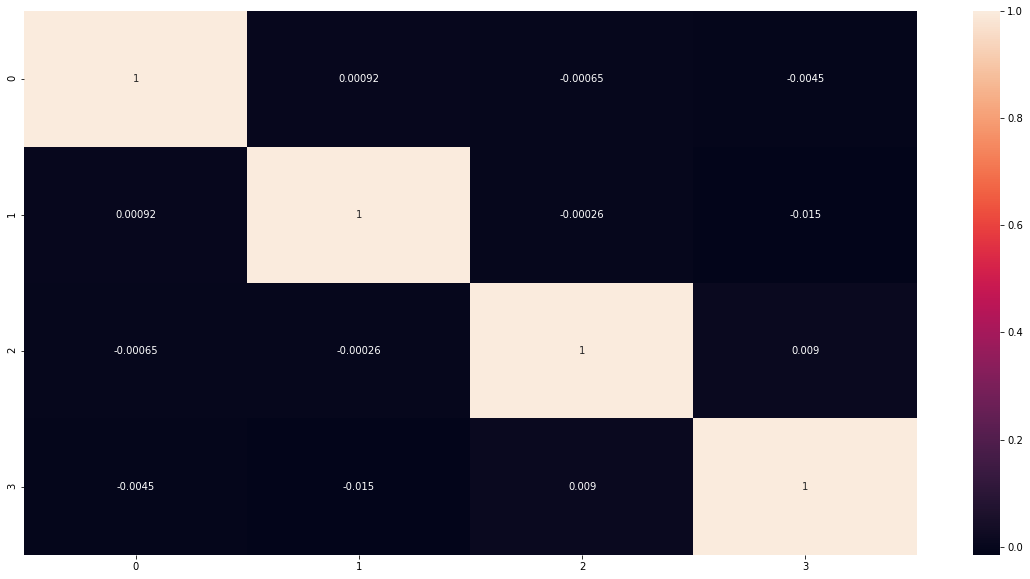

In [40]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [41]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.008959421276881315 , min corr:  -0.015302266510758318


##### we see that correlations are indeed very close to 0

#### Indeed - there is no correlation between any two components! 
#### We effectively have removed multicollinearity from our situation, and our models will be much more stable


## Outlier Analysis

In [46]:
#Let's create the newer matrix according to the given principal components
rownames = list(ngo['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pcs_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


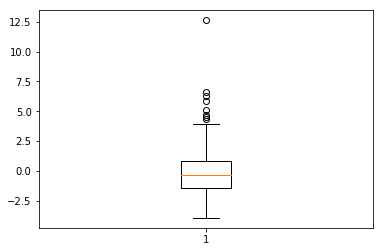

In [47]:
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

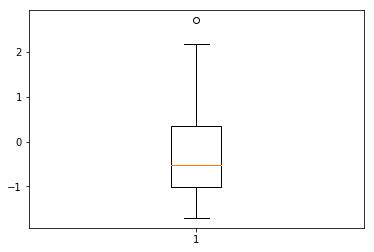

In [48]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

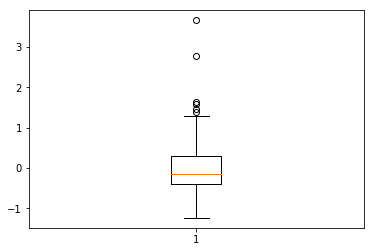

In [49]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1 ) & (pcs_df2.PC3 <= Q3)]

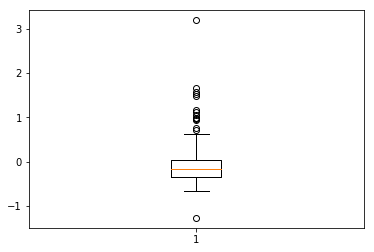

In [50]:
plt.boxplot(pcs_df2.PC4)
Q1 = pcs_df2.PC4.quantile(0.05)
Q3 = pcs_df2.PC4.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC4 >= Q1 ) & (pcs_df2.PC4 <= Q3)]

In [51]:
#Outlier analysis is now done.Let's check the data again.
pcs_df2.shape

(107, 5)

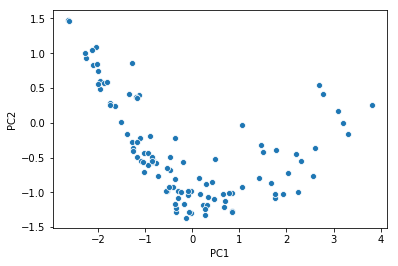

In [52]:
#let's check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

# Clustering

### Hopkins Statistics:

##### The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

##### If the value is between {0.01, ...,0.3}, the data is regularly spaced.

##### If the value is around 0.5, it is random.

##### If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [54]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [68]:
pcs_df = pd.DataFrame(pcs_df2.drop(['country'],axis=1))
pcs_df

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
2,-0.459260,-0.678794,0.967852,-0.176389
4,0.648777,-1.026498,-0.244170,-0.267513
6,-0.334274,-1.279033,0.190772,-0.501435
8,3.818137,0.262614,-0.297336,0.974405
9,-0.467475,-0.494061,0.608605,-0.258517
10,1.499580,-0.425885,-0.557800,0.224968
11,1.471293,-0.325734,0.426551,-0.117964
12,-1.015203,-0.714450,-0.105622,-0.386759
13,0.844517,-1.009902,-0.413553,-0.146518


In [69]:
pcs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 165
Data columns (total 4 columns):
PC1    107 non-null float64
PC2    107 non-null float64
PC3    107 non-null float64
PC4    107 non-null float64
dtypes: float64(4)
memory usage: 4.2 KB


In [70]:
hopkins(pcs_df)

0.8023206116253582

#### 0.80 is a good Hopkins score. Hence the data is suitable for clustering. 

## K-means Clustering

### Silhouette Analysis
###### Silhouette score will help us to choose an appropriate value of k

In [71]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df)
    sse_.append([k, silhouette_score(pcs_df, kmeans.labels_)])

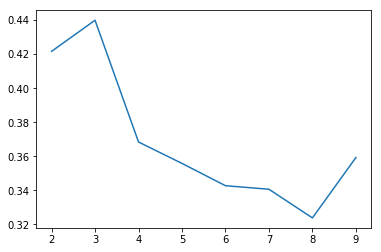

In [72]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

## Sum of Squared Distances

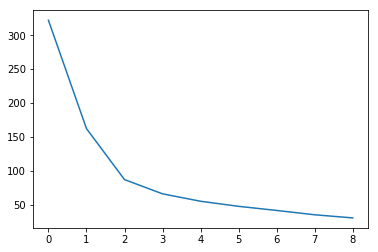

In [73]:
#The sihouette score reaches a peak at around 3 clusters indicating that it might be the ideal number of clusters.
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [75]:
#The smaller the value of sum of square distances, the better it is.
#A distinct elbow is formed at around 3-8 clusters. Let's finally create the clusters and see for ourselves which ones fare better
#So we can choose 3. So lets choose k=3.
model_clus3 = KMeans(n_clusters = 3, max_iter=50, random_state=50)
model_clus3.fit(pcs_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [76]:
model_clus3.labels_

array([0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1,
       2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0])

In [77]:
pcs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 165
Data columns (total 4 columns):
PC1    107 non-null float64
PC2    107 non-null float64
PC3    107 non-null float64
PC4    107 non-null float64
dtypes: float64(4)
memory usage: 4.2 KB


In [87]:
#Joining the original dataframe with the PCA dataframe.
df1 = pd.merge(data_df ,pcs_df2, how='inner',on= 'country')
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143,-2.636647,1.472085,-0.546500,0.237267
1,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980,-0.459260,-0.678794,0.967852,-0.176389
2,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692,0.648777,-1.026498,-0.244170,-0.267513
3,Armenia,-0.500139,-0.375593,-0.507965,-0.348702,-0.541791,-0.001119,0.308586,-0.830971,-0.531634,-0.334274,-1.279033,0.190772,-0.501435
4,Austria,-0.842325,0.925736,2.277255,1.076069,1.351552,-0.653583,1.118196,-0.996114,1.851513,3.818137,0.262614,-0.297336,0.974405


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 14 columns):
country       107 non-null object
child_mort    107 non-null float64
exports       107 non-null float64
health        107 non-null float64
imports       107 non-null float64
income        107 non-null float64
inflation     107 non-null float64
life_expec    107 non-null float64
total_fer     107 non-null float64
gdpp          107 non-null float64
PC1           107 non-null float64
PC2           107 non-null float64
PC3           107 non-null float64
PC4           107 non-null float64
dtypes: float64(13), object(1)
memory usage: 12.5+ KB


In [90]:
# analysis of clusters formed
#Add the Cluster number
final_df = pd.concat([df1, pd.Series(model_clus3.labels_).rename('ClusterID')], axis=1)

In [91]:
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143,-2.636647,1.472085,-0.546500,0.237267,0
1,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980,-0.459260,-0.678794,0.967852,-0.176389,1
2,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692,0.648777,-1.026498,-0.244170,-0.267513,1
3,Armenia,-0.500139,-0.375593,-0.507965,-0.348702,-0.541791,-0.001119,0.308586,-0.830971,-0.531634,-0.334274,-1.279033,0.190772,-0.501435,1
4,Austria,-0.842325,0.925736,2.277255,1.076069,1.351552,-0.653583,1.118196,-0.996114,1.851513,3.818137,0.262614,-0.297336,0.974405,2


In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 15 columns):
country       107 non-null object
child_mort    107 non-null float64
exports       107 non-null float64
health        107 non-null float64
imports       107 non-null float64
income        107 non-null float64
inflation     107 non-null float64
life_expec    107 non-null float64
total_fer     107 non-null float64
gdpp          107 non-null float64
PC1           107 non-null float64
PC2           107 non-null float64
PC3           107 non-null float64
PC4           107 non-null float64
ClusterID     107 non-null int32
dtypes: float64(13), int32(1), object(1)
memory usage: 13.0+ KB


In [93]:
final_df['ClusterID'].value_counts()

1    55
0    31
2    21
Name: ClusterID, dtype: int64

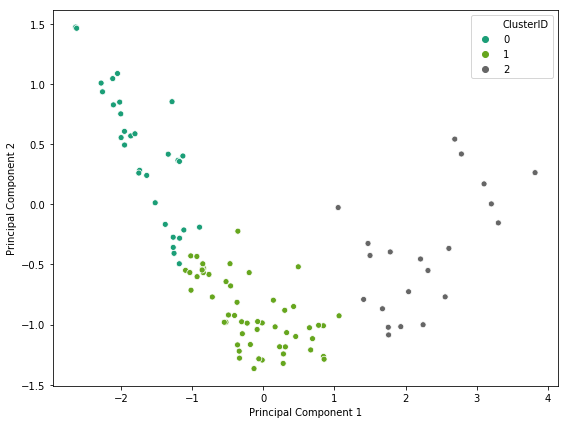

In [94]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
sns.scatterplot(final_df['PC1'], final_df['PC2'], hue=final_df['ClusterID'], palette="Dark2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

##### From the scatter plot cluster 0 seems to be our choice having low PC1 and high PC2. Lets analyse it further on the basis of mean. 

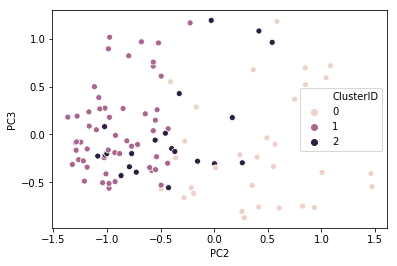

In [96]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=final_df)

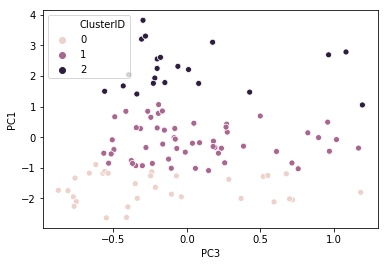

In [97]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=final_df)

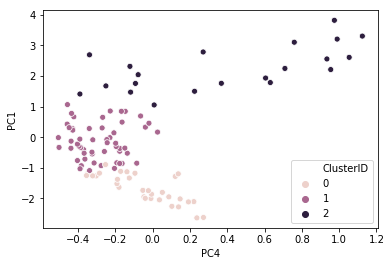

In [98]:
sns.scatterplot(x='PC4',y='PC1',hue='ClusterID',data=final_df)

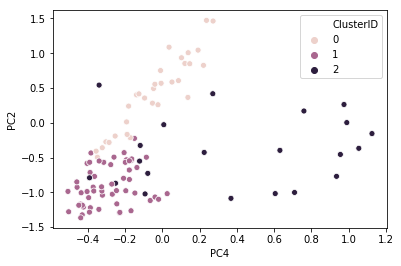

In [99]:
sns.scatterplot(x='PC4',y='PC2',hue='ClusterID',data=final_df)

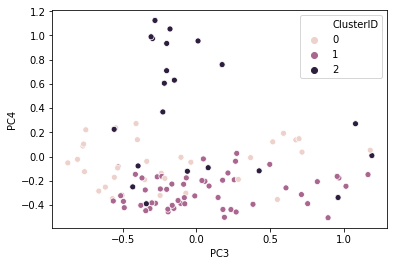

In [100]:
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',data=final_df)

In [101]:
final_df[(final_df['ClusterID']==2)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
4,Austria,-0.842325,0.925736,2.277255,1.076069,1.351552,-0.653583,1.118196,-0.996114,1.851513,3.818137,0.262614,-0.297336,0.974405,2
6,Bahamas,-0.606762,0.132380,0.639759,0.383911,0.298542,-0.773348,0.364809,-0.718675,0.820344,1.499580,-0.425885,-0.557800,0.224968,2
7,Bahrain,-0.735702,0.387556,-0.015512,0.268371,1.242620,-0.032338,0.612190,-0.520504,0.422062,1.471293,-0.325734,0.426551,-0.117964,2
25,Cyprus,-0.859682,0.447370,0.434120,0.756019,0.869139,-0.546022,1.050729,-1.009325,0.973110,2.313643,-0.550715,-0.060642,-0.121376,2
26,Czech Republic,-0.864641,0.314199,0.279507,0.398744,0.578653,-0.871449,0.780859,-0.949874,0.372958,1.674183,-0.868746,-0.431674,-0.250297,2
34,Finland,-0.874560,0.581888,1.708755,0.726707,1.175186,-0.702965,1.061973,-0.712069,1.813322,3.203899,0.002812,-0.307152,0.989393,2
38,Germany,-0.844804,0.570872,2.105056,0.606319,1.206309,-0.664462,1.073218,-1.029142,1.573261,3.302161,-0.155142,-0.280614,1.124339,2
40,Greece,-0.852243,-0.082103,0.951459,0.113518,0.599402,-0.672503,1.106952,-0.969691,0.760329,1.931671,-1.017385,-0.217149,0.605709,2
44,Iceland,-0.884478,0.831984,1.599785,0.785432,1.123313,-0.218702,1.286865,-0.494082,1.578717,3.101590,0.169252,0.175180,0.759527,2
49,Israel,-0.834886,0.183009,0.709471,0.236496,0.646087,-0.568726,1.219397,0.054190,0.962198,1.783724,-0.396339,-0.148938,0.630935,2


In [102]:
#One thing we noticed is some even though some distinct clusters are being formed, some are not so good.
#Now let's create the cluster means wrt to the various variables mentioned in the question and plot and see how they are related
km_clust_PC1 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC1.mean())
km_clust_PC2 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC2.mean())
km_clust_PC3 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC3.mean())
km_clust_PC4 = pd.DataFrame(final_df.groupby(["ClusterID"]).PC4.mean())
km_clust_child_mort = pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
km_clust_health = pd.DataFrame(final_df.groupby(["ClusterID"]).health.mean())
km_clust_total_fer =  pd.DataFrame(final_df.groupby(["ClusterID"]).total_fer.mean())
km_clust_income = pd.DataFrame(final_df.groupby(["ClusterID"]).income.mean())
km_clust_life_expec = pd.DataFrame(final_df.groupby(["ClusterID"]).life_expec.mean())
km_clust_exports = pd.DataFrame(final_df.groupby(["ClusterID"]).exports.mean())
km_clust_imports = pd.DataFrame(final_df.groupby(["ClusterID"]).imports.mean())
km_clust_inflation = pd.DataFrame(final_df.groupby(["ClusterID"]).inflation.mean())
km_clust_gdpp = pd.DataFrame(final_df.groupby(["ClusterID"]).gdpp.mean())

In [105]:
dfs = pd.concat([pd.Series([0,1,2]), km_clust_PC1, km_clust_PC2,km_clust_PC3,km_clust_PC4], axis=1)
dfs.columns = ["ClusterID", "PC1_mean", "PC2_mean","PC3_mean","PC4_mean"]
dfs

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,-1.675467,0.420359,-0.162298,-0.044405
1,1,-0.158406,-0.898237,0.054961,-0.287195
2,2,2.248040,-0.409205,0.003988,0.391572


In [106]:
df2 = pd.concat([pd.Series([0,1,2]),km_clust_child_mort,km_clust_health,km_clust_total_fer,km_clust_income,km_clust_life_expec,km_clust_exports,km_clust_imports,km_clust_inflation,km_clust_gdpp], axis=1)
df2.columns = ["ClusterID","child_mort_mean","health_mean","total_fer_mean","income_mean","life_expec_mean","exports_mean","imports_mean","inflation_mean","gdpp_mean"]
df2

,ClusterID,child_mort_mean,health_mean,total_fer_mean,income_mean,life_expec_mean,exports_mean,imports_mean,inflation_mean,gdpp_mean
0,0,0.629363,-0.515127,0.768883,-0.658504,-0.812607,-0.364951,-0.389467,0.184909,-0.594259
1,1,-0.430845,-0.359983,-0.414453,-0.251428,0.302453,-0.260249,-0.250966,-0.127333,-0.354457
2,2,-0.806666,0.835915,-0.755792,1.021298,0.966127,0.382766,0.433147,-0.439294,0.981684


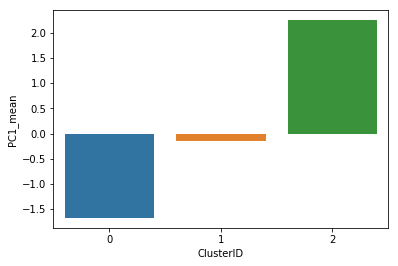

In [108]:
sns.barplot(x=dfs.ClusterID, y=dfs.PC1_mean)

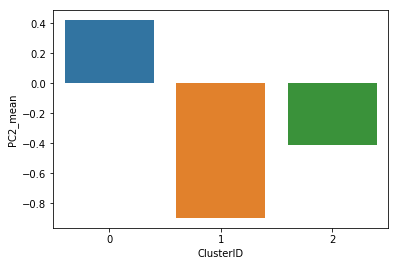

In [109]:
sns.barplot(x=dfs.ClusterID, y=dfs.PC2_mean)

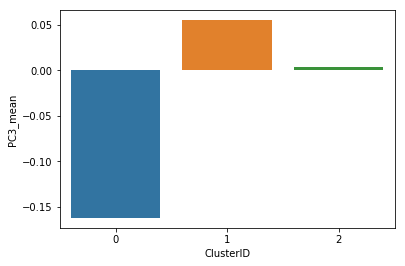

In [110]:
sns.barplot(x=dfs.ClusterID, y=dfs.PC3_mean)

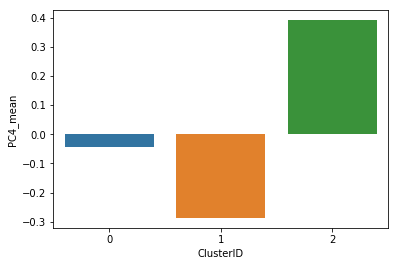

In [111]:
sns.barplot(x=dfs.ClusterID, y=dfs.PC4_mean)

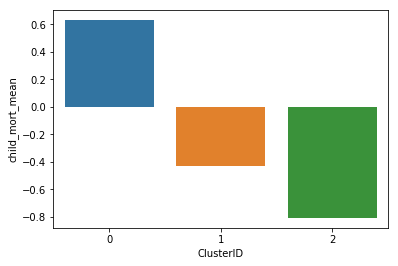

In [112]:
sns.barplot(x=df2.ClusterID, y=df2.child_mort_mean)

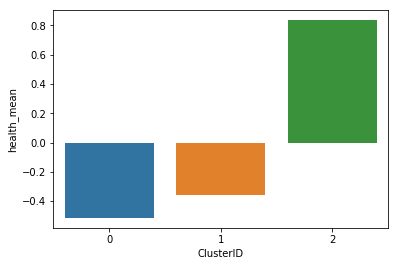

In [113]:
sns.barplot(x=df2.ClusterID, y=df2.health_mean)

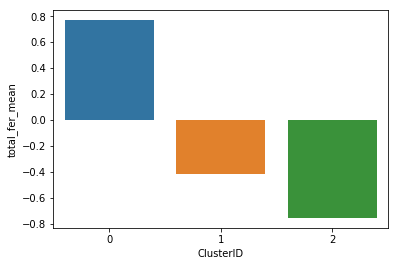

In [114]:
sns.barplot(x=df2.ClusterID, y=df2.total_fer_mean)

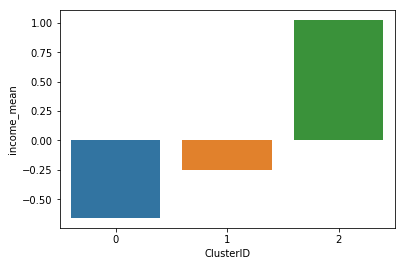

In [115]:
sns.barplot(x=df2.ClusterID, y=df2.income_mean)

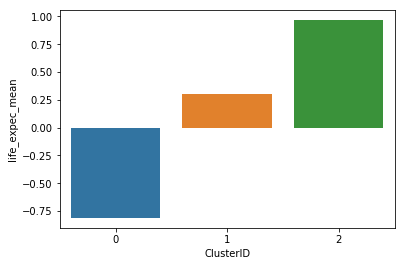

In [116]:
sns.barplot(x=df2.ClusterID, y=df2.life_expec_mean)

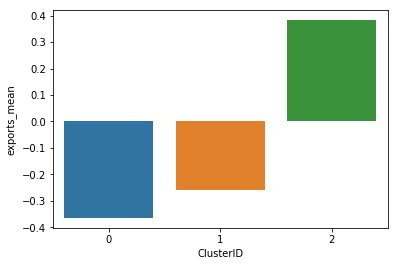

In [117]:
sns.barplot(x=df2.ClusterID, y=df2.exports_mean)

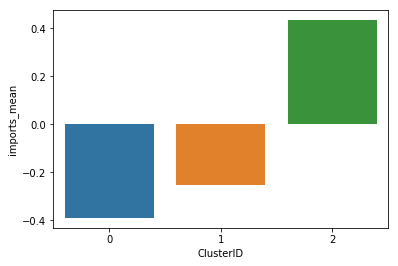

In [118]:
sns.barplot(x=df2.ClusterID, y=df2.imports_mean)

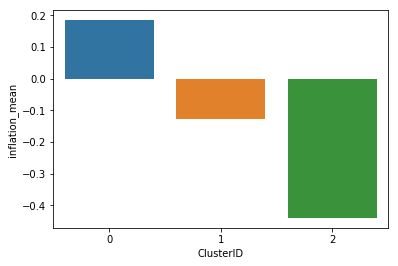

In [119]:
sns.barplot(x=df2.ClusterID, y=df2.inflation_mean)

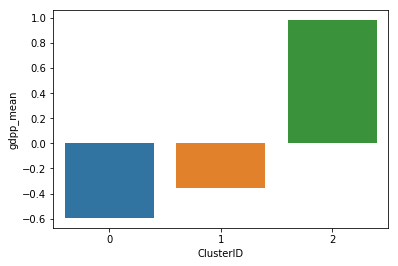

In [120]:
sns.barplot(x=df2.ClusterID, y=df2.gdpp_mean)

#### We observe that Child mortality, Income, Inflation and GDP per capita are good predictors for the development of a country. On cross-checking with the original Principal components that we drew, these 4 components had good scores. Hence we can say that they are a good source of information for the Clustering.

##### On Analysing the barplots we can clearly see that Cluster 0 has high child_mort and total_fert but low health, income,gdpp and life_expec. So Cluster 0 is our preferred cluster for aids.

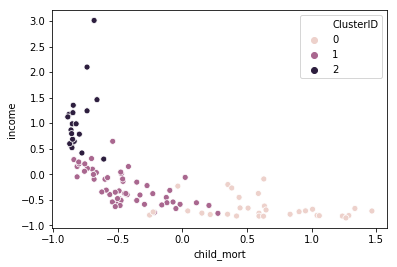

In [121]:
#Along child-mortality and income
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=final_df)

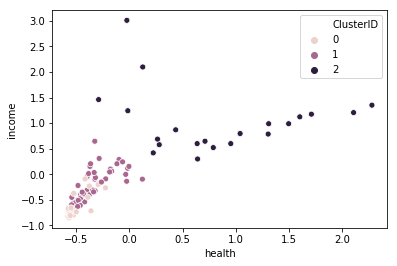

In [122]:
sns.scatterplot(x='health',y='income',hue='ClusterID',data=final_df)

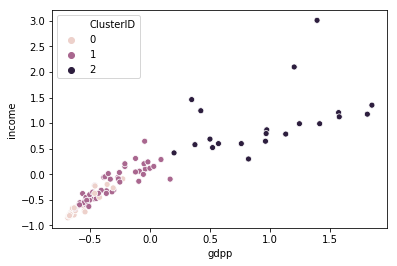

In [123]:
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',data=final_df)

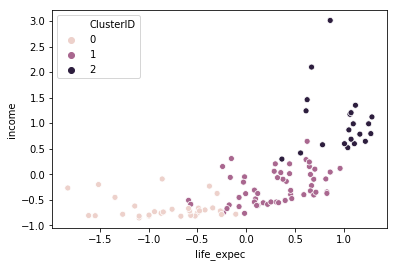

In [124]:
sns.scatterplot(x='life_expec',y='income',hue='ClusterID',data=final_df)

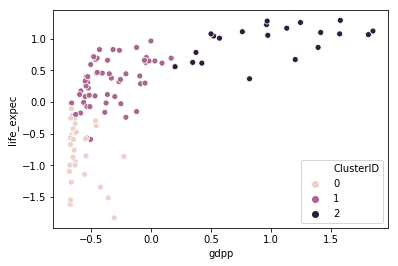

In [125]:
sns.scatterplot(x='gdpp',y='life_expec',hue='ClusterID',data=final_df)

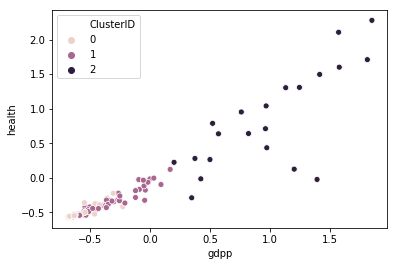

In [126]:
sns.scatterplot(x='gdpp',y='health',hue='ClusterID',data=final_df)

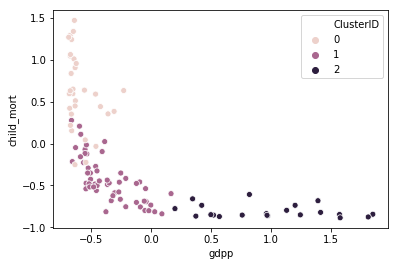

In [127]:
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',data=final_df)

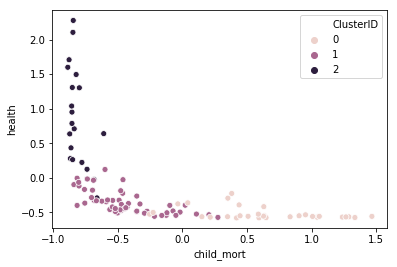

In [128]:
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',data=final_df)

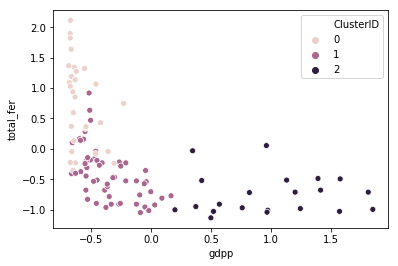

In [129]:
sns.scatterplot(x='gdpp',y='total_fer',hue='ClusterID',data=final_df)

In [130]:
#let's take a look at those countries clusters and try to make sense if the clustering process worked well.
final_df[final_df['ClusterID']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
1,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980,-0.459260,-0.678794,0.967852,-0.176389,1
2,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692,0.648777,-1.026498,-0.244170,-0.267513,1
3,Armenia,-0.500139,-0.375593,-0.507965,-0.348702,-0.541791,-0.001119,0.308586,-0.830971,-0.531634,-0.334274,-1.279033,0.190772,-0.501435,1
5,Azerbaijan,0.023059,-0.236426,-0.395991,-0.365682,-0.059378,0.569325,-0.163686,-0.679041,-0.388688,-0.467475,-0.494061,0.608605,-0.258517,1
8,Bangladesh,0.275979,-0.406108,-0.571803,-0.436625,-0.762768,-0.060718,-0.017507,-0.408208,-0.665958,-1.015203,-0.714450,-0.105622,-0.386759,1
9,Barbados,-0.596843,-0.061234,0.121276,0.081821,-0.095688,-0.705803,0.690902,-0.771520,0.165633,0.844517,-1.009902,-0.413553,-0.146518,1
10,Belarus,-0.812570,-0.240415,-0.398827,-0.183471,-0.049003,0.692307,-0.017507,-0.963085,-0.378322,-0.014535,-0.986440,0.894360,-0.505127,1
11,Belize,-0.482781,-0.272325,-0.461335,-0.278221,-0.480582,-0.628325,0.094939,-0.157192,-0.470527,-0.404075,-0.924495,-0.494883,-0.370053,1
12,Bhutan,0.109845,-0.361309,-0.523686,-0.343087,-0.556316,-0.169509,0.173651,-0.375179,-0.588375,-0.716069,-0.770733,-0.123956,-0.362802,1
13,Bolivia,0.206550,-0.367470,-0.533416,-0.401692,-0.608707,0.094428,0.117428,0.166487,-0.599287,-1.018930,-0.429185,0.058407,-0.204315,1


In [131]:
#let's take a look at those countries clusters and try to make sense if the clustering process worked well.
final_df[final_df['ClusterID']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
4,Austria,-0.842325,0.925736,2.277255,1.076069,1.351552,-0.653583,1.118196,-0.996114,1.851513,3.818137,0.262614,-0.297336,0.974405,2
6,Bahamas,-0.606762,0.132380,0.639759,0.383911,0.298542,-0.773348,0.364809,-0.718675,0.820344,1.499580,-0.425885,-0.557800,0.224968,2
7,Bahrain,-0.735702,0.387556,-0.015512,0.268371,1.242620,-0.032338,0.612190,-0.520504,0.422062,1.471293,-0.325734,0.426551,-0.117964,2
25,Cyprus,-0.859682,0.447370,0.434120,0.756019,0.869139,-0.546022,1.050729,-1.009325,0.973110,2.313643,-0.550715,-0.060642,-0.121376,2
26,Czech Republic,-0.864641,0.314199,0.279507,0.398744,0.578653,-0.871449,0.780859,-0.949874,0.372958,1.674183,-0.868746,-0.431674,-0.250297,2
34,Finland,-0.874560,0.581888,1.708755,0.726707,1.175186,-0.702965,1.061973,-0.712069,1.813322,3.203899,0.002812,-0.307152,0.989393,2
38,Germany,-0.844804,0.570872,2.105056,0.606319,1.206309,-0.664462,1.073218,-1.029142,1.573261,3.302161,-0.155142,-0.280614,1.124339,2
40,Greece,-0.852243,-0.082103,0.951459,0.113518,0.599402,-0.672503,1.106952,-0.969691,0.760329,1.931671,-1.017385,-0.217149,0.605709,2
44,Iceland,-0.884478,0.831984,1.599785,0.785432,1.123313,-0.218702,1.286865,-0.494082,1.578717,3.101590,0.169252,0.175180,0.759527,2
49,Israel,-0.834886,0.183009,0.709471,0.236496,0.646087,-0.568726,1.219397,0.054190,0.962198,1.783724,-0.396339,-0.148938,0.630935,2


In [132]:
df_reqd4=final_df[(final_df.ClusterID==0)]

In [133]:
len(df_reqd4)

31

In [134]:
df_reqd4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143,-2.636647,1.472085,-0.546500,0.237267,0
14,Botswana,0.352847,-0.258821,-0.294038,-0.226419,-0.199433,0.107672,-1.513036,-0.044895,-0.360863,-1.129553,0.400938,-0.237767,-0.137562,0
17,Cambodia,0.151999,-0.389198,-0.561832,-0.416067,-0.758618,-0.441014,-0.501024,-0.044895,-0.664431,-1.179960,-0.494621,-0.569686,-0.347361,0
22,Comoros,1.238068,-0.405796,-0.567362,-0.420832,-0.816196,-0.370064,-0.523513,1.190368,-0.665358,-1.949935,0.605858,-0.770259,0.087001,0
23,"Congo, Rep.",0.635522,-0.283126,-0.549197,-0.345975,-0.620119,1.222073,-1.141965,1.322482,-0.557822,-2.048032,1.086585,0.717462,0.036697,0
31,Eritrea,0.419796,-0.411571,-0.579498,-0.440224,-0.815678,0.361203,-0.995785,1.097889,-0.681017,-1.948997,0.492197,-0.037243,-0.046391,0
35,Gabon,0.630563,-0.131962,-0.416609,-0.335441,-0.090501,0.834208,-0.860850,0.747787,-0.229921,-1.281984,0.852403,0.518754,0.121448,0
36,Gambia,1.042178,-0.405414,-0.568863,-0.431545,-0.803228,-0.329385,-0.568491,1.824514,-0.676652,-2.105662,0.825765,-0.750258,0.221167,0
39,Ghana,0.903320,-0.391355,-0.548655,-0.406984,-0.730607,0.834208,-0.939562,0.873295,-0.635842,-2.002446,0.751031,0.368342,-0.008975,0
45,India,0.509062,-0.395881,-0.556264,-0.422988,-0.660579,0.113348,-0.489779,-0.229854,-0.633659,-1.265515,-0.274099,-0.071013,-0.302038,0


In [135]:
country4=set(df_reqd4['country'])

In [136]:
country4

{'Afghanistan',
 'Botswana',
 'Cambodia',
 'Comoros',
 'Congo, Rep.',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'India',
 'Iraq',
 'Kenya',
 'Lao',
 'Liberia',
 'Madagascar',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Turkmenistan',
 'Uganda',
 'Vanuatu',
 'Yemen'}

### These are the group of countries which are in direst need of aid.

## Hierarchical Clustering

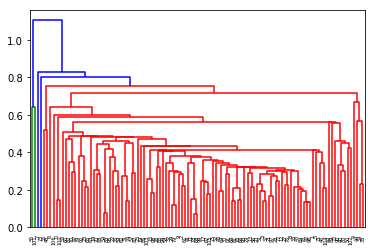

In [138]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure.
mergings = linkage(pcs_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

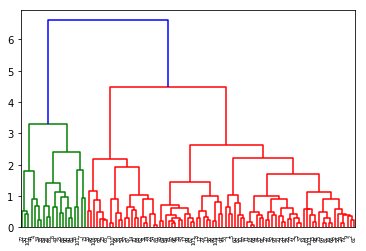

In [139]:
#The dendrogram with single linkage is not very clear. So let us try complete linkage.
mergings = linkage(pcs_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [148]:
#he dendrogram can be cut at 2 or 3. 2 will be too less So taking no of clusters as 3
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))

In [149]:
#Add the cluster Id to the df
df_hc = pd.concat([df1, clusterCut.rename('ClusterID')], axis=1)

In [150]:
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143,-2.636647,1.472085,-0.546500,0.237267,0
1,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980,-0.459260,-0.678794,0.967852,-0.176389,1
2,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692,0.648777,-1.026498,-0.244170,-0.267513,1
3,Armenia,-0.500139,-0.375593,-0.507965,-0.348702,-0.541791,-0.001119,0.308586,-0.830971,-0.531634,-0.334274,-1.279033,0.190772,-0.501435,1
4,Austria,-0.842325,0.925736,2.277255,1.076069,1.351552,-0.653583,1.118196,-0.996114,1.851513,3.818137,0.262614,-0.297336,0.974405,2


In [151]:
df_hc['ClusterID'].value_counts()

1    63
0    23
2    21
Name: ClusterID, dtype: int64

In [152]:
df_hc[df_hc['ClusterID']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143,-2.636647,1.472085,-0.546500,0.237267,0
14,Botswana,0.352847,-0.258821,-0.294038,-0.226419,-0.199433,0.107672,-1.513036,-0.044895,-0.360863,-1.129553,0.400938,-0.237767,-0.137562,0
22,Comoros,1.238068,-0.405796,-0.567362,-0.420832,-0.816196,-0.370064,-0.523513,1.190368,-0.665358,-1.949935,0.605858,-0.770259,0.087001,0
23,"Congo, Rep.",0.635522,-0.283126,-0.549197,-0.345975,-0.620119,1.222073,-1.141965,1.322482,-0.557822,-2.048032,1.086585,0.717462,0.036697,0
31,Eritrea,0.419796,-0.411571,-0.579498,-0.440224,-0.815678,0.361203,-0.995785,1.097889,-0.681017,-1.948997,0.492197,-0.037243,-0.046391,0
35,Gabon,0.630563,-0.131962,-0.416609,-0.335441,-0.090501,0.834208,-0.860850,0.747787,-0.229921,-1.281984,0.852403,0.518754,0.121448,0
36,Gambia,1.042178,-0.405414,-0.568863,-0.431545,-0.803228,-0.329385,-0.568491,1.824514,-0.676652,-2.105662,0.825765,-0.750258,0.221167,0
39,Ghana,0.903320,-0.391355,-0.548655,-0.406984,-0.730607,0.834208,-0.939562,0.873295,-0.635842,-2.002446,0.751031,0.368342,-0.008975,0
48,Iraq,-0.033972,-0.314212,-0.376529,-0.343547,-0.230557,0.834208,-0.377333,1.064860,-0.461798,-1.198155,0.364740,0.675340,0.137709,0
54,Kenya,0.593369,-0.401719,-0.561117,-0.425771,-0.760693,-0.538453,-0.872095,0.939352,-0.654556,-1.737626,0.282077,-0.872349,-0.052118,0


In [153]:
df_hc[df_hc['ClusterID']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
1,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980,-0.459260,-0.678794,0.967852,-0.176389,1
2,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692,0.648777,-1.026498,-0.244170,-0.267513,1
3,Armenia,-0.500139,-0.375593,-0.507965,-0.348702,-0.541791,-0.001119,0.308586,-0.830971,-0.531634,-0.334274,-1.279033,0.190772,-0.501435,1
5,Azerbaijan,0.023059,-0.236426,-0.395991,-0.365682,-0.059378,0.569325,-0.163686,-0.679041,-0.388688,-0.467475,-0.494061,0.608605,-0.258517,1
8,Bangladesh,0.275979,-0.406108,-0.571803,-0.436625,-0.762768,-0.060718,-0.017507,-0.408208,-0.665958,-1.015203,-0.714450,-0.105622,-0.386759,1
9,Barbados,-0.596843,-0.061234,0.121276,0.081821,-0.095688,-0.705803,0.690902,-0.771520,0.165633,0.844517,-1.009902,-0.413553,-0.146518,1
10,Belarus,-0.812570,-0.240415,-0.398827,-0.183471,-0.049003,0.692307,-0.017507,-0.963085,-0.378322,-0.014535,-0.986440,0.894360,-0.505127,1
11,Belize,-0.482781,-0.272325,-0.461335,-0.278221,-0.480582,-0.628325,0.094939,-0.157192,-0.470527,-0.404075,-0.924495,-0.494883,-0.370053,1
12,Bhutan,0.109845,-0.361309,-0.523686,-0.343087,-0.556316,-0.169509,0.173651,-0.375179,-0.588375,-0.716069,-0.770733,-0.123956,-0.362802,1
13,Bolivia,0.206550,-0.367470,-0.533416,-0.401692,-0.608707,0.094428,0.117428,0.166487,-0.599287,-1.018930,-0.429185,0.058407,-0.204315,1


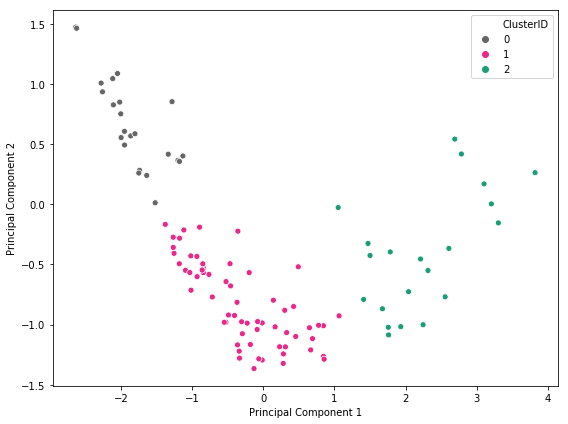

In [154]:
#Analyse the scatter plot
%matplotlib inline
fig = plt.figure(figsize = (8,6))
sns.scatterplot(df_hc['PC1'], df_hc['PC2'], hue=df_hc['ClusterID'], palette="Dark2_r")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

##### Cluster 0 seems to be our choice with low PC1 and high PC2

In [155]:
len(final_df[(df_hc['ClusterID']==0)])

23

In [156]:
len(final_df[(df_hc['ClusterID']==1)])

63

In [157]:
len(final_df[(df_hc['ClusterID']==2)])

21

In [158]:
#Lets take the mean of the PCs and some original features, cluster wise
hc_clust_PC1 = pd.DataFrame(df_hc.groupby(["ClusterID"]).PC1.mean())
hc_clust_PC2 = pd.DataFrame(df_hc.groupby(["ClusterID"]).PC2.mean())
hc_clust_PC3 = pd.DataFrame(df_hc.groupby(["ClusterID"]).PC3.mean())
hc_clust_PC4 = pd.DataFrame(df_hc.groupby(["ClusterID"]).PC4.mean())
hc_clust_child_mort = pd.DataFrame(df_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clust_health = pd.DataFrame(df_hc.groupby(["ClusterID"]).health.mean())
hc_clust_total_fer =  pd.DataFrame(df_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clust_income = pd.DataFrame(df_hc.groupby(["ClusterID"]).income.mean())
hc_clust_life_expec = pd.DataFrame(df_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clust_exports = pd.DataFrame(df_hc.groupby(["ClusterID"]).exports.mean())
hc_clust_imports = pd.DataFrame(df_hc.groupby(["ClusterID"]).imports.mean())
hc_clust_inflation = pd.DataFrame(df_hc.groupby(["ClusterID"]).inflation.mean())
hc_clust_gdpp = pd.DataFrame(df_hc.groupby(["ClusterID"]).gdpp.mean())

In [160]:
df3 = pd.concat([pd.Series([0,1,2]), hc_clust_PC1, hc_clust_PC2,hc_clust_PC3,hc_clust_PC4], axis=1)
df3.columns = ["ClusterID", "PC1_mean", "PC2_mean","PC3_mean","PC4_mean"]
df3

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,-1.843957,0.670451,-0.136694,0.036741
1,1,-0.289536,-0.822100,0.018025,-0.285989
2,2,2.248040,-0.409205,0.003988,0.391572


In [161]:
df4 = pd.concat([pd.Series([0,1,2]),hc_clust_child_mort,hc_clust_health,hc_clust_total_fer,hc_clust_income,hc_clust_life_expec,hc_clust_exports,hc_clust_imports,hc_clust_inflation,hc_clust_gdpp], axis=1)
df4.columns = ["ClusterID","child_mort_mean","health_mean","total_fer_mean","income_mean","life_expec_mean","exports_mean","imports_mean","inflation_mean","gdpp_mean"]
df4

,ClusterID,child_mort_mean,health_mean,total_fer_mean,income_mean,life_expec_mean,exports_mean,imports_mean,inflation_mean,gdpp_mean
0,0,0.749045,-0.511188,1.030109,-0.648085,-0.942985,-0.363630,-0.390850,0.277131,-0.589863
1,1,-0.339909,-0.381122,-0.359556,-0.306924,0.208456,-0.274027,-0.268049,-0.121351,-0.386513
2,2,-0.806666,0.835915,-0.755792,1.021298,0.966127,0.382766,0.433147,-0.439294,0.981684


#### Plot the various mean values to choose the Cluster

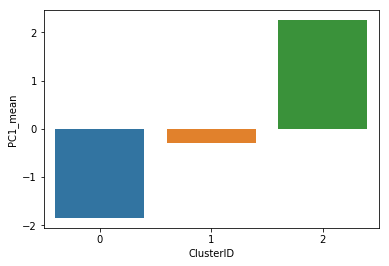

In [162]:
sns.barplot(x=df3.ClusterID, y=df3.PC1_mean)

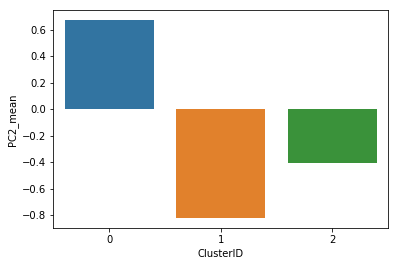

In [163]:
sns.barplot(x=df3.ClusterID, y=df3.PC2_mean)

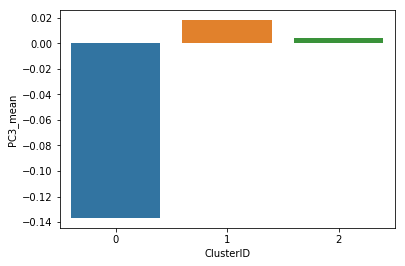

In [164]:
sns.barplot(x=df3.ClusterID, y=df3.PC3_mean)

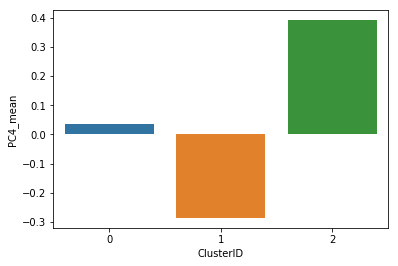

In [165]:
sns.barplot(x=df3.ClusterID, y=df3.PC4_mean)

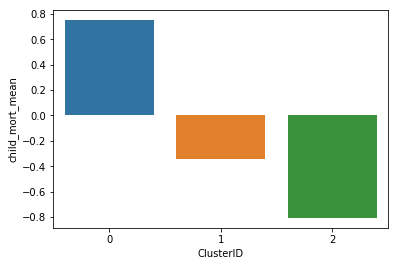

In [166]:
sns.barplot(x=df4.ClusterID, y=df4.child_mort_mean)

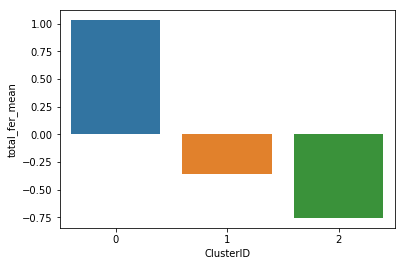

In [167]:
sns.barplot(x=df4.ClusterID, y=df4.total_fer_mean)

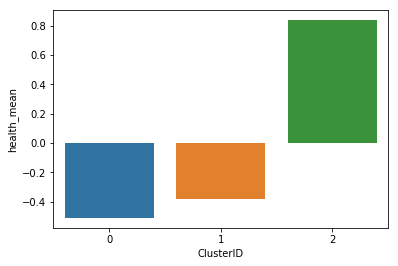

In [168]:
sns.barplot(x=df4.ClusterID, y=df4.health_mean)

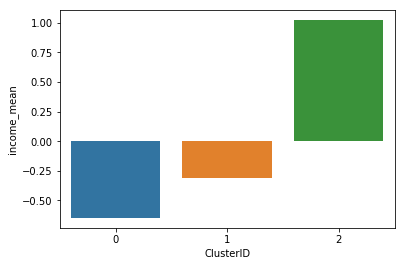

In [169]:
sns.barplot(x=df4.ClusterID, y=df4.income_mean)

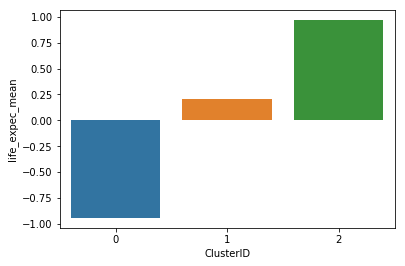

In [170]:
sns.barplot(x=df4.ClusterID, y=df4.life_expec_mean)

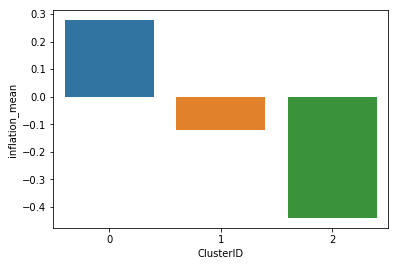

In [171]:
sns.barplot(x=df4.ClusterID, y=df4.inflation_mean)

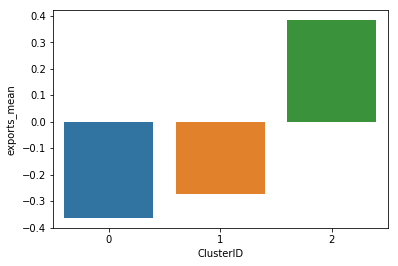

In [173]:
sns.barplot(x=df4.ClusterID, y=df4.exports_mean)

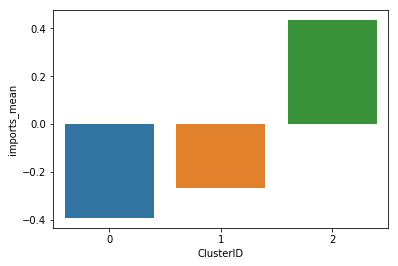

In [174]:
sns.barplot(x=df4.ClusterID, y=df4.imports_mean)

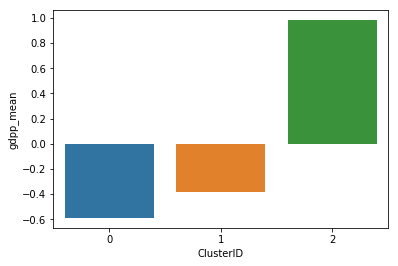

In [175]:
sns.barplot(x=df4.ClusterID, y=df4.gdpp_mean)

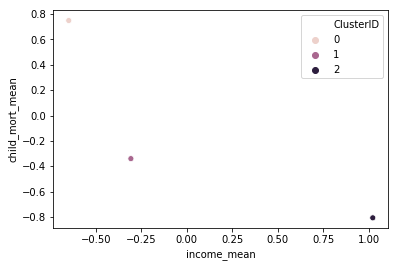

In [172]:
sns.scatterplot(x='income_mean',y='child_mort_mean',hue="ClusterID",data=df4)

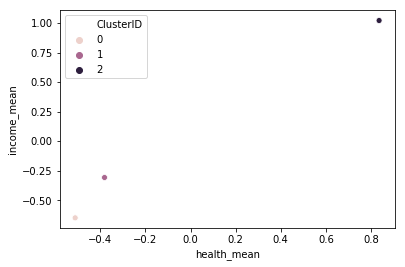

In [177]:
sns.scatterplot(x='health_mean',y='income_mean',hue='ClusterID',data=df4)

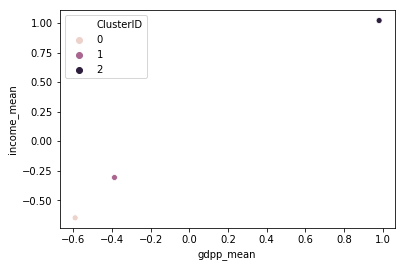

In [179]:
sns.scatterplot(x='gdpp_mean',y='income_mean',hue='ClusterID',data=df4)

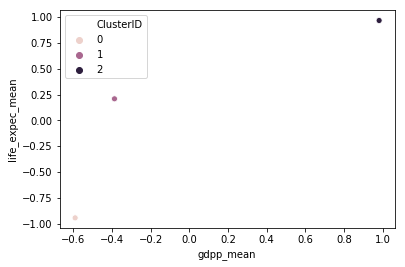

In [180]:
sns.scatterplot(x='gdpp_mean',y='life_expec_mean',hue='ClusterID',data=df4)

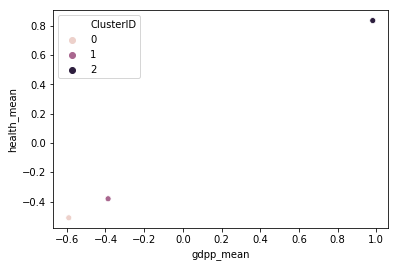

In [181]:
sns.scatterplot(x='gdpp_mean',y='health_mean',hue='ClusterID',data=df4)

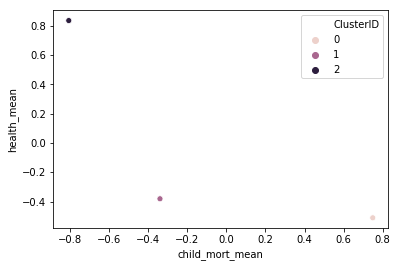

In [182]:
sns.scatterplot(x='child_mort_mean',y='health_mean',hue='ClusterID',data=df4)

#### Suitable cluster according to our need is cluster 0 which is having countries which are in dire need. 
### Also hierarchical clustering doesn't represents good clusters here.

In [183]:
df_help = df_hc[(df_hc.ClusterID==0)]

In [184]:
len(df_help)

23

In [185]:
countryhc = set(df_help['country'])

In [186]:
com=countryhc.intersection(country4)

In [187]:
len(com)

23

In [189]:
com

{'Afghanistan',
 'Botswana',
 'Comoros',
 'Congo, Rep.',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Iraq',
 'Kenya',
 'Lao',
 'Liberia',
 'Madagascar',
 'Mauritania',
 'Namibia',
 'Pakistan',
 'Rwanda',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Uganda',
 'Yemen'}

# Binning

In [196]:
#Let's use the binning to see the list of countries which might be important.
#The upper limit that we got from the clustering process was .98 in gdpp.
#let's filter the complete dataset with .98 as the cut-off limit for gdpp.
fin=data_df[data_df['gdpp']<=0.98]
fin.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [197]:
len(fin)

142

In [199]:
#So we got 142 countries here. We can create further sub categories by taking another good clustering indicator. 
#Let's use the describe function to see how the variables are aligned now.
fin.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.144874,-0.246046,-0.344603,-0.239245,-0.322078,0.077370,-0.196707,0.132807,-0.361357
std,1.017605,0.247540,0.321344,0.290124,0.513286,1.051284,0.954726,1.026022,0.387916
min,-0.869601,-0.412796,-0.579498,-0.447814,-0.857746,-1.134440,-4.324181,-1.134833,-0.694711
25%,-0.604282,-0.393706,-0.553029,-0.418151,-0.748503,-0.514567,-0.869284,-0.698858,-0.641570
50%,-0.296811,-0.342262,-0.467313,-0.344119,-0.477469,-0.174712,-0.011884,-0.210037,-0.512265
75%,0.634283,-0.224508,-0.286115,-0.211135,-0.051597,0.396678,0.553156,1.008712,-0.236059
max,4.208640,1.383250,1.039213,1.760994,1.465671,9.102343,1.275620,3.000326,0.973110


In [200]:
#From the clustering process we got child_mortality to be at least -0.43.
#Let's see how many countries lie within that range
fin2=fin[fin['child_mort']>=-0.43]

In [201]:
fin2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
9,Azerbaijan,0.023059,-0.236426,-0.395991,-0.365682,-0.059378,0.569325,-0.163686,-0.679041,-0.388688
12,Bangladesh,0.275979,-0.406108,-0.571803,-0.436625,-0.762768,-0.060718,-0.017507,-0.408208,-0.665958
17,Benin,1.803418,-0.402819,-0.569363,-0.428690,-0.794929,-0.652448,-0.984541,1.593315,-0.665958
18,Bhutan,0.109845,-0.361309,-0.523686,-0.343087,-0.556316,-0.169509,0.173651,-0.375179,-0.588375
19,Bolivia,0.206550,-0.367470,-0.533416,-0.401692,-0.608707,0.094428,0.117428,0.166487,-0.599287
21,Botswana,0.352847,-0.258821,-0.294038,-0.226419,-0.199433,0.107672,-1.513036,-0.044895,-0.360863
25,Burkina Faso,1.927399,-0.406713,-0.565101,-0.436288,-0.815159,-0.091936,-1.423079,1.930205,-0.675943


In [202]:
len(fin2)

79

In [204]:
fin2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.782918,-0.355625,-0.510868,-0.378746,-0.621423,0.290259,-0.801923,0.776217,-0.579070
std,0.963251,0.105205,0.086759,0.090162,0.277281,1.215638,0.847991,0.911860,0.145350
min,-0.425750,-0.412796,-0.579498,-0.447814,-0.857746,-0.688396,-4.324181,-0.679041,-0.694711
25%,-0.041411,-0.405674,-0.564580,-0.430972,-0.801413,-0.336480,-1.338745,-0.110952,-0.670105
50%,0.603287,-0.389198,-0.548945,-0.411948,-0.719195,-0.013417,-0.737160,0.747787,-0.635842
75%,1.353369,-0.344014,-0.497941,-0.345471,-0.548275,0.640276,-0.214287,1.494230,-0.539545
max,4.208640,0.403429,-0.161348,0.236802,0.858764,9.102343,0.690902,3.000326,0.225648


In [205]:
fin3=fin2[fin2['income']<1.02]
len(fin3)

79

In [206]:
fin4=fin3[fin3['health']<-0.51]
len(fin4)

56

In [207]:
fin4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
12,Bangladesh,0.275979,-0.406108,-0.571803,-0.436625,-0.762768,-0.060718,-0.017507,-0.408208,-0.665958
17,Benin,1.803418,-0.402819,-0.569363,-0.428690,-0.794929,-0.652448,-0.984541,1.593315,-0.665958
18,Bhutan,0.109845,-0.361309,-0.523686,-0.343087,-0.556316,-0.169509,0.173651,-0.375179,-0.588375
19,Bolivia,0.206550,-0.367470,-0.533416,-0.401692,-0.608707,0.094428,0.117428,0.166487,-0.599287
25,Burkina Faso,1.927399,-0.406713,-0.565101,-0.436288,-0.815159,-0.091936,-1.423079,1.930205,-0.675943
26,Burundi,1.371966,-0.411709,-0.571740,-0.441702,-0.849706,0.427424,-1.445568,2.187827,-0.694711
27,Cambodia,0.151999,-0.389198,-0.561832,-0.416067,-0.758618,-0.441014,-0.501024,-0.044895,-0.664431
28,Cameroon,1.729030,-0.396675,-0.549309,-0.423814,-0.751356,-0.555482,-1.490547,1.428173,-0.635842


In [208]:
fin4.country

0                   Afghanistan
3                        Angola
12                   Bangladesh
17                        Benin
18                       Bhutan
19                      Bolivia
25                 Burkina Faso
26                      Burundi
27                     Cambodia
28                     Cameroon
30                   Cape Verde
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
47                        Egypt
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
70                    Indonesia
80                        Kenya
83              Kyrgyz Republic
84                          Lao
87                      Lesotho
88                      Liberia
93      

## Note--

#### 1. Values are so small because i have applied this formula -- 

#                                                 normal_df=(data_df-data_df.mean())/data_df.std()

#### We can do without this also. 

#### 2. Major focus should be given to the countries present in fin4.

## Conclusion
#### 1. The above mentioned countries have low income, low GDPP,low life_expec,low health and high child mortality rate, high total_fer.

#### 2. Hence the above mentioned countries are best for maximum fund investment.

#### 3.  K-means and Hierarchical don't produce identical insights.This depends on the way the principal components and the final number of clusters are chosen. 

## Recommendations

#### 1. More jobs to be created to reduce the unemployment. Time to time hike should be given.
#### 2. Infrastructure should be maintained such as educational institutions, hospitals etc.
#### 3. Clealiness and hospitals should be there to improve the health conditions in the surroundings. 
#### 4. GDP includes what is spent on environmental protection, healthcare, and education,This should be kept in mind!
#### 5. Implementation of each and eveything is more important after taking the reforms.